# Lesson: Hypothesis Testing - CORRELATION

<a href = "https://www.canva.com/design/DAFwzxaEV98/KRDmCqY8FoNOEaDsE3y49w/view?utm_content=DAFwzxaEV98&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">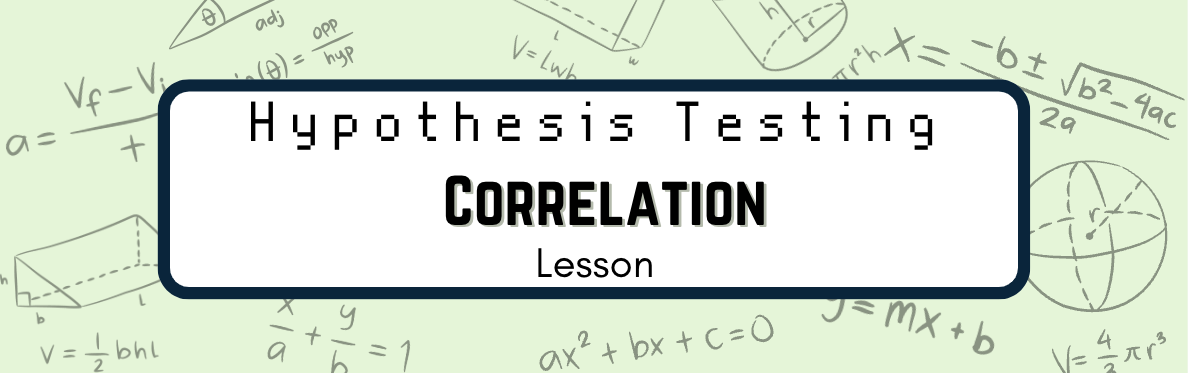</a>

<hr style="border:2px solid gray">

#### When comparing **two continuous variables**, we will use correlation

- Check if two variables are related

- Pearson's correlation coefficient or Pearson's r is the test statistic

- Unitless; tells us how much two variables tend to move together

- For discrete or non-normal data: Spearman's rank correlation

___
### Spearman's Correlation Coefficient
- monotonic function (always in same direction)
- non-linear
- unitless metric (-1 to 1 value ONLY)

___
### Pearson's Correlation Coefficient
<br>
The correlation coefficient, $r_{xy}$, is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation.
<br>
<br>
<u><b>Goal</b></u>: answer if two samples have LINEAR relationship
<br>
<br>
How do we complete this goal:
<br>
1. Calculate the Pearson correlation coefficient, $r_{xy}$
<br>
2. Calculate the corresponding t-values
    <br>
3. Test whether the t-values are signifcant or not

<hr style="border:2px solid gray">

In [1]:
#standard ds imports
import numpy as np
import pandas as pd

#stats and plotting
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

<div class="alert alert-block alert-success">
<b>Step-by-Step:</b>

1. State our hypothesis, set alpha value
        <br>
2. Select the data, run .info
        <br>
3. Plot the data
        <br>
4. Test for assumputions: Is there normality?
        <br>
5. Run stats test
        <br>
6. Draw Conclusions 
</div>

<div class="alert alert-block alert-success">
<b>Abbreviated Hypothesis Testing Procedure:</b>
    <br>
    <br>
1. Setup: set α and variables
<br>
2. Calculate: test statistic + p-value
<br>
3. Conclude: do we reject or refuse to reject the 𝐻0  
</div>

Null hypothesis for this hypothesis test
- $H_0$: there is no linear relationship between the two variables
___

In [2]:
#bring in data from url (or 'exam_scores.csv')
url = 'https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv'

In [3]:
#get our data & look at it!
df = pd.read_csv(url)
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


<b>Let's visualize our continuous variables using a Seaborn pairplot</b>

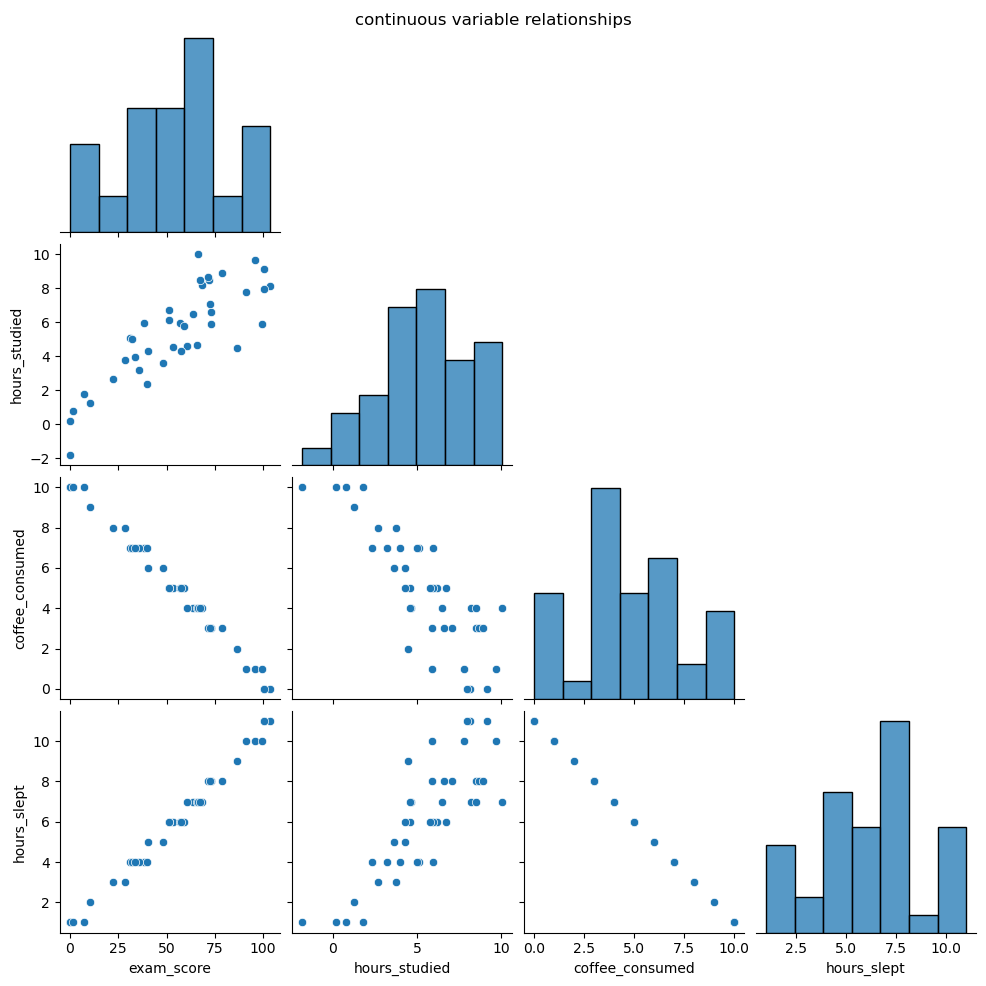

In [4]:
sns.pairplot(df, corner=True)
plt.suptitle("continuous variable relationships")
plt.show()

<b> Pre-Set Values:</b>
    <br>
Before we perform the test, we will choose some values for our confidence interval and, based on that value, our alpha.

<div class="alert alert-block alert-danger">
<h3>Degrees of Freedom for Pearson's Correlation Coefficient: (df) = n - 2</h3>

In this formula:

- "n" represents the number of paired observations or data points for which you are calculating the correlation.

    
- The "- 2" accounts for the two degrees of freedom used by the sample mean of the x-values and the sample mean of the y-values when estimating the population correlation.
</div>

### There's the **HARD** way...

In [5]:
#number of rows & cols
nrows, ncols = df.shape
 

#degrees of freedom: how much the data can vary
deg_f = nrows - 2

#confidence interval (!)
conf_int = 0.95

α = 1- conf_int

When performing a correlation test, our null hypothesis is that **there is no linear correlation between the two variables**.

- $H_0$: There is no linear correlation between the number of hours studied and the score on the exam.




#### Equations for Standard Deviation & Pearson's Correlation Coefficient:

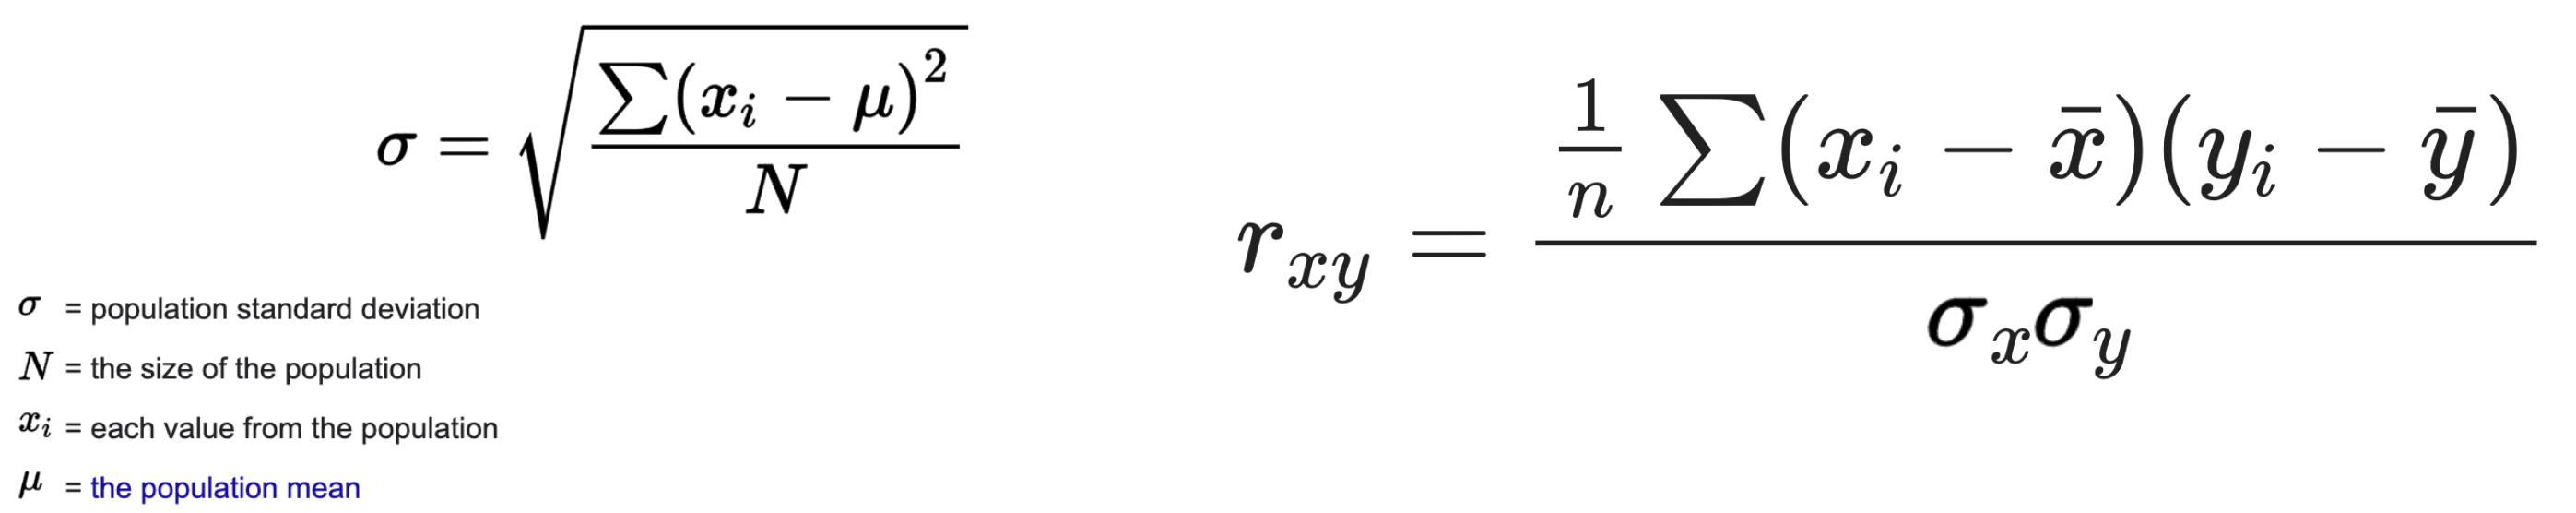

In [6]:
x = df.hours_studied
y = df.exam_score

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / nrows
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / nrows) / (stdev(x) * stdev(y))
r_xy


0.8351498542413306

#### Equation for the Test Statistic:

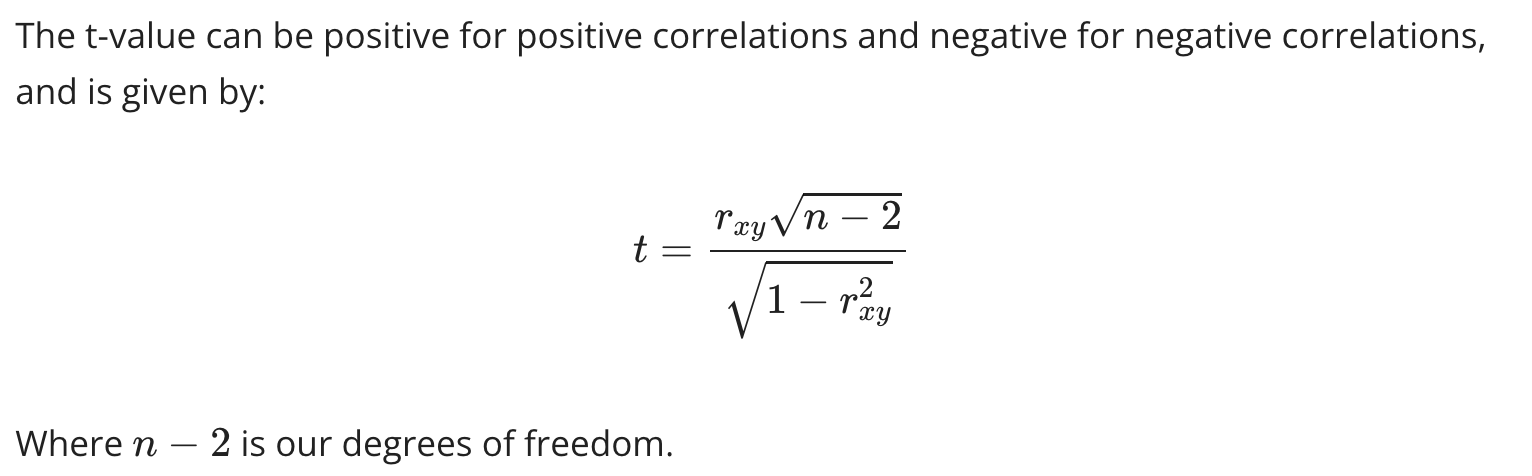

In [7]:
t = (r_xy * sqrt(deg_f)) / sqrt(1 - r_xy**2)
t

9.359998377263368

In [8]:
p = stats.t.sf(t, df=deg_f) * 2 # *2 for a two-tailed test
p

2.0762953315463266e-11

In [9]:
p < α

True

<hr style="border:0.5px solid black">

### Annnnnndddd the *easy* way...

## Step-by-Step

### What's the relationship between exam score and hours studied?

#### 1. State Hypothesis & Set $\alpha$
- $H_0$: There is no linear relationship between exam score and hours studied
- $H_a$: There is a linear relationship between exam score and hours studied

In [10]:
#set the alpha
α = 0.05

#set x and y variables
x = df.hours_studied
y = df.exam_score

#### 2: Select data and run `.info`

In [11]:
scores_hrstudy = df[['hours_studied', 'exam_score']]

In [12]:
scores_hrstudy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hours_studied  40 non-null     float64
 1   exam_score     40 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


#### 3. Plot data
- Let's get a visual on the relationship we are comparing.

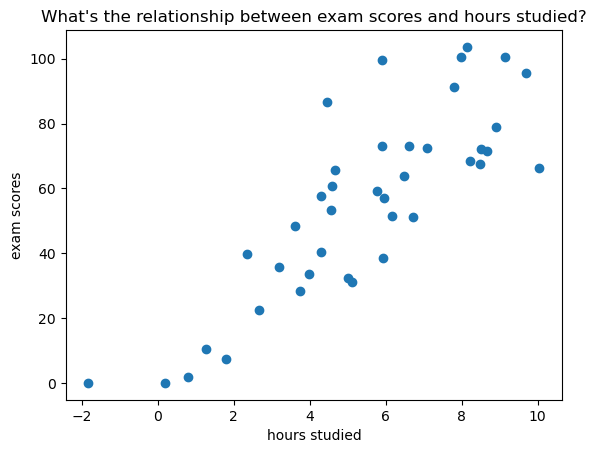

In [13]:
#plot our variables
plt.scatter(df.hours_studied, df.exam_score)

plt.title("What's the relationship between exam scores and hours studied?")
plt.xlabel('hours studied')
plt.ylabel('exam scores')
plt.show()

With this visual, we can see that there <b>is</b> a relationship between exam scores and hours studied.

<b>4: Test for Assumptions (distributions)</b>

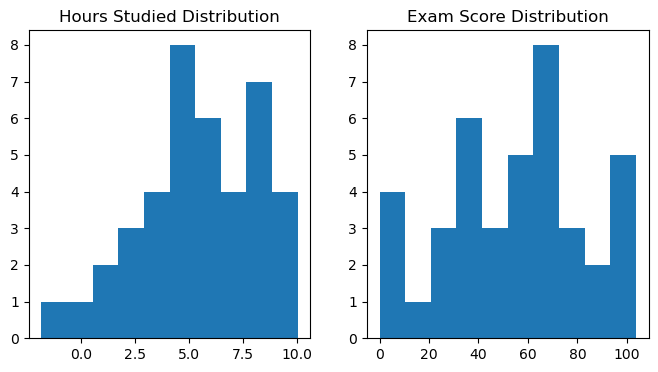

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))


axs[0].hist(x)
axs[0].set_title('Hours Studied Distribution')


axs[1].hist(y)
axs[1].set_title('Exam Score Distribution')

plt.show()

### <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html">`stats.shapiro`</a> can test for normalcy when you are uncertain

- If `p_value` is *greater than* your chosen significance level (e.g., 0.05), you fail to reject the null hypothesis. **This suggests that the data is normally distributed.**

- If `p_value` is *less than* your chosen significance level, you may reject the null hypothesis, **indicating that the data does not follow a normal distribution.**

- The value of the statistic tends to be high (close to 1) for samples drawn from a normal distribution.

If the data is found to be normally distributed, you can then proceed with calculating Pearson's correlation coefficient to assess the linear relationship between this feature and another feature. 

If the data is not normally distributed, you might consider using non-parametric correlation tests like Spearman's rank correlation, which do not assume normality.

In [15]:
def eval_dist(r, p, α=0.05):
    """
    This function will take in:
    - r: the test statistic
    - p: p-value
    - α: id defaulted to 5%
    and print out if the data used to create r & p from the stats.shapiro test is normally distributed.
    """
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [16]:
r,p = stats.shapiro(df.hours_studied)
r,p

(0.973827600479126, 0.47151827812194824)

In [17]:
eval_dist(r,p)

The data is normally distributed


In [18]:
r,p = stats.shapiro(df.exam_score)
r,p

(0.9630349278450012, 0.21242168545722961)

In [19]:
eval_dist(r,p)

The data is normally distributed


In [20]:
#run stats.pearsonr
r, p = stats.pearsonr(x,y)

In [21]:
#output results
print('r =', r)
print('p =', p)

r = 0.8351498542413308
p = 2.0762953315462826e-11


In [22]:
#evaluate p-value
if p < α:
    print(f"""We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    
else:
    print(f"""We fail to reject H₀,there does not appear to be a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of 0.835150.
P-value: 2.0762953315462826e-11


<b>Conclusion</b>: There is a linear relationship between exam score and hours studied.

<hr style="border:1.5px solid black">

## Correlation coefficient, r
- tells us the strength of the relationship
- tells us the direction of the relationship
- values are between -1 and 1

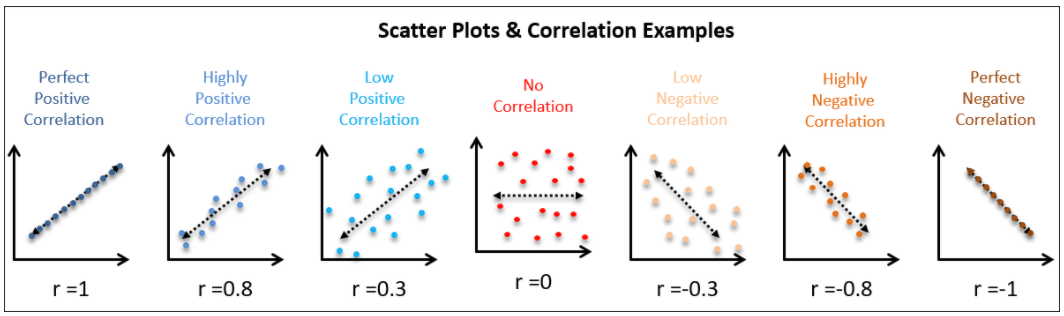

<b>Examples of Different Correlations:</b>
<br>
- perfect positive correlation (r=1)
<br>
- highly positive correlation (r= 0.08)
<br>
- slightly positive correlation (r= 0.03)
<br>
<br>
- perfect negative correlation (r= -1)
<br>
- highly negative correlation (r= -0.08)
<br>
- slightly negative correlation (r= -0.03)
<br>
<br>
- absolutely no correlation (r=0)
<br>
- no correlation (r≈0)

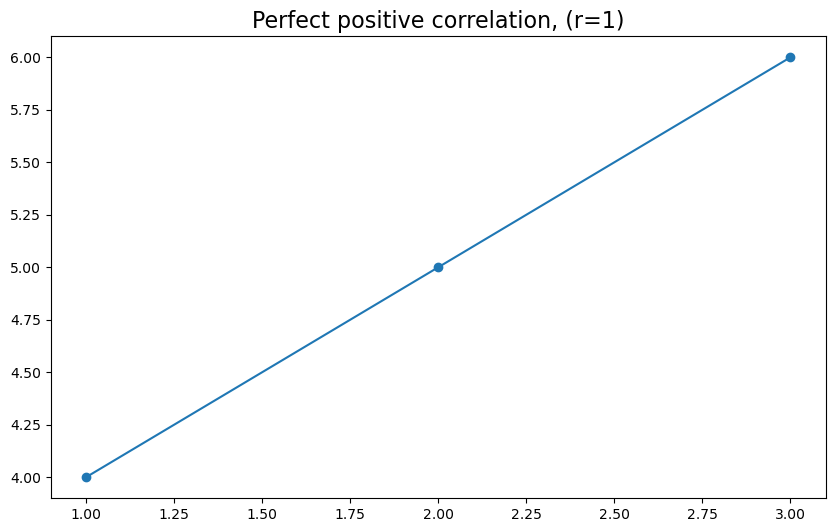

In [23]:
x = [1, 2, 3]
y = [4, 5, 6]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Perfect positive correlation, (r=1)', size=16)
plt.show()

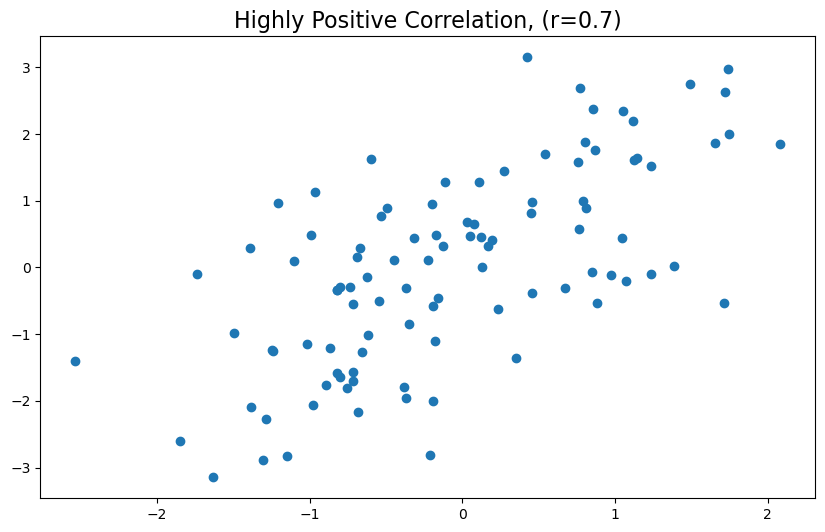

In [24]:
x = np.random.randn(100)
y = x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(f'Highly Positive Correlation, (r={round(r,1)})', size=16)
plt.show()

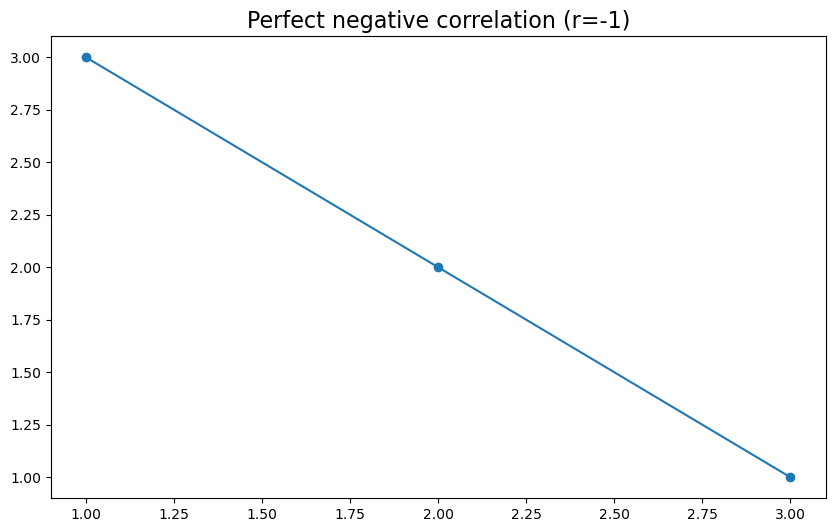

In [25]:
x = [3, 2, 1]
y = [1, 2, 3]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Perfect negative correlation (r=-1)', size=16)
plt.show()

r = -0.6301214479367232
p = 2.153301431790435e-12


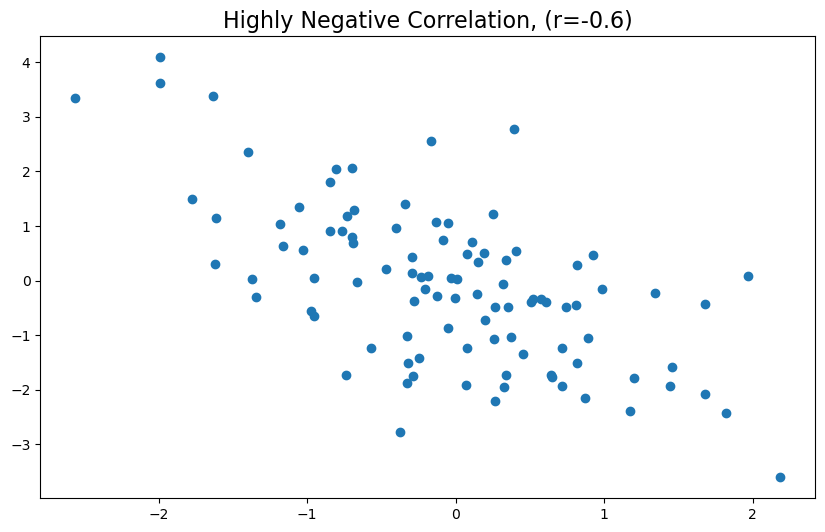

In [26]:
x = np.random.randn(100)
y = -x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(f'Highly Negative Correlation, (r={round(r,1)})', size=16)
plt.show()

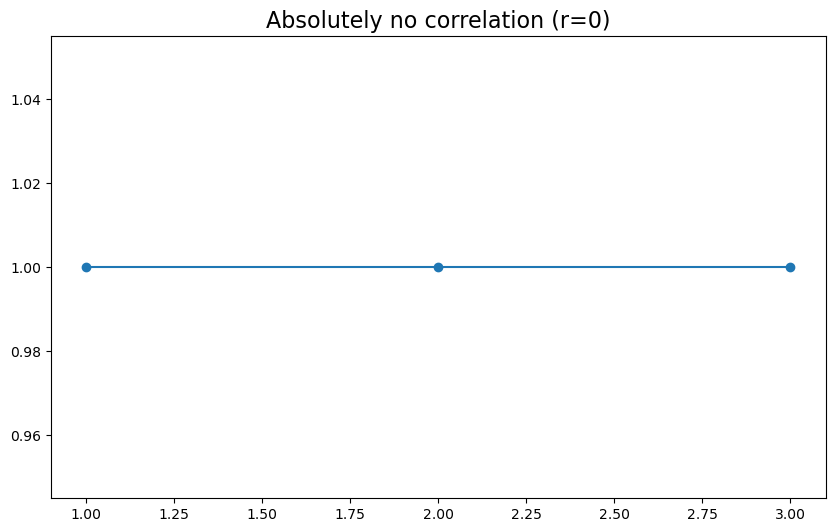

In [27]:
x = [1, 2, 3]
y = [1, 1, 1]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Absolutely no correlation (r=0)', size=16)
plt.show()

r = 0.14685391948036725


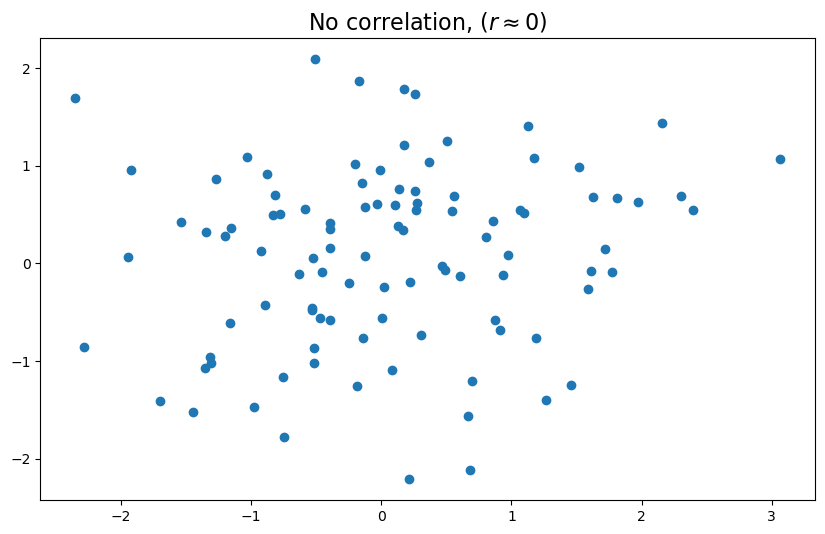

In [28]:
x = np.random.randn(100)
y = np.random.randn(100)

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(r'No correlation, ($r \approx 0$)', size=16)

print('r =', r)

<b>Now that you're expert correlation-ers:</b>
<br>
[Check out this game](http://guessthecorrelation.com/)

<hr style="border:1.5px solid black">

## Correlation "Gotcha's"

<div class="alert alert-danger" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Correlation "gotchas":</strong>
    <br>
    When looking at correlation, keep in mind...
<br>
<br>
1. Correlation is not causation!
<br>
2. Non-Linear Relationship: this is just looking at a linear relationship
<br>
3. Confounding Variables: correlation itself just looks 2 variables, there could be more going on
<br>
4. Scale of the relationship: correlation doesn't tell us how large the relationship is.
</div>

### Gotcha #1. not causation!

<a href = "https://www.datasciencecentral.com/spurious-correlations-15-examples/">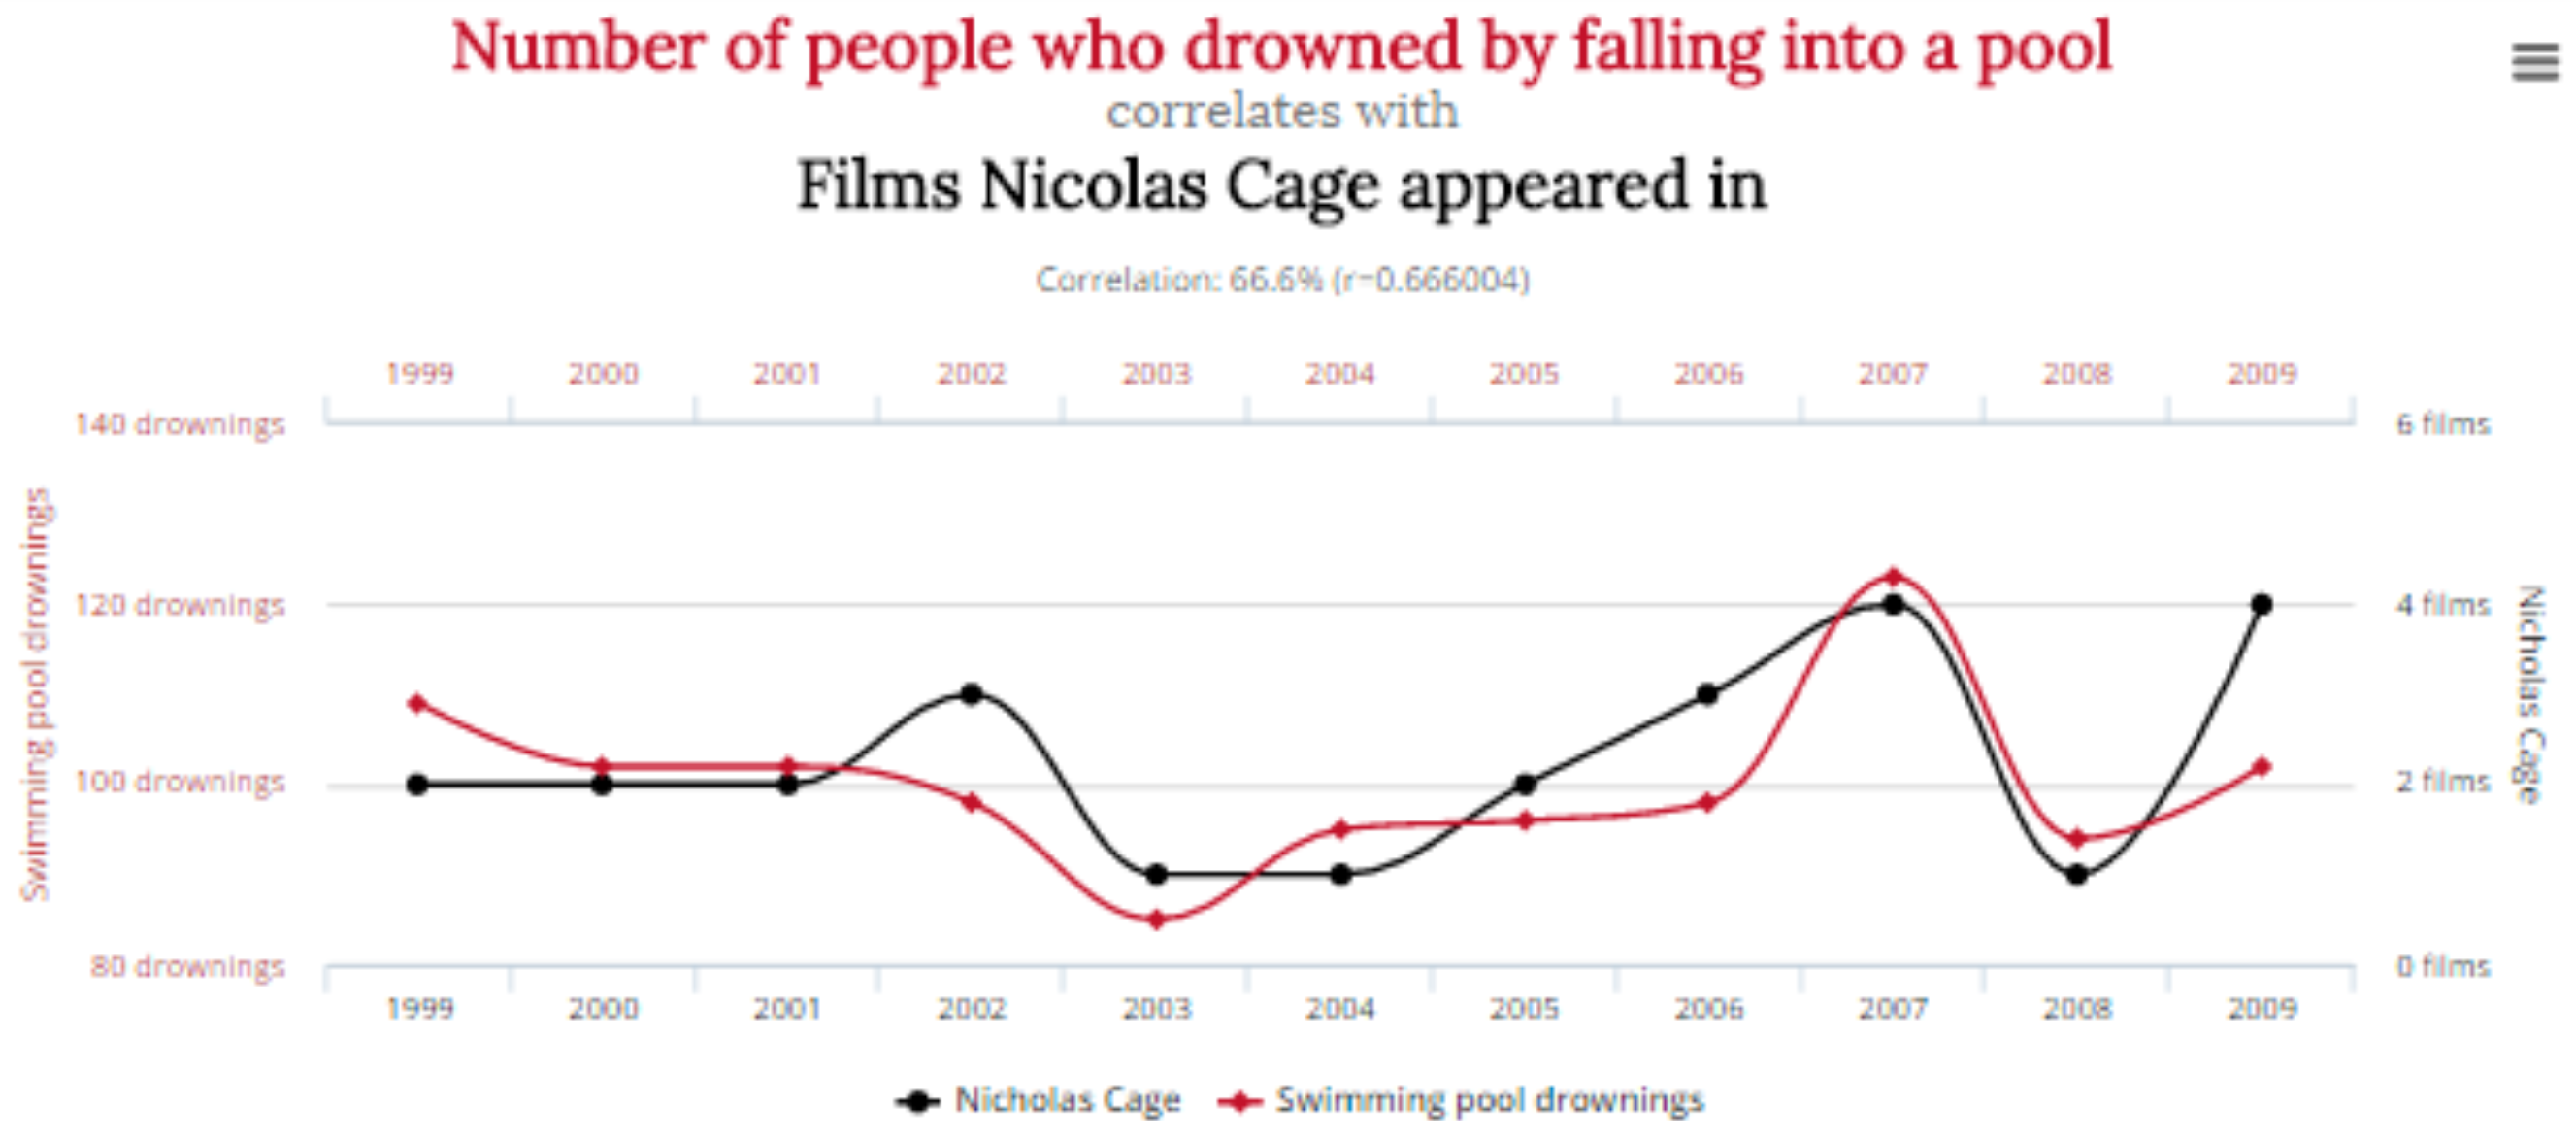</a>


<a href = "https://www.statology.org/spurious-correlation-examples/">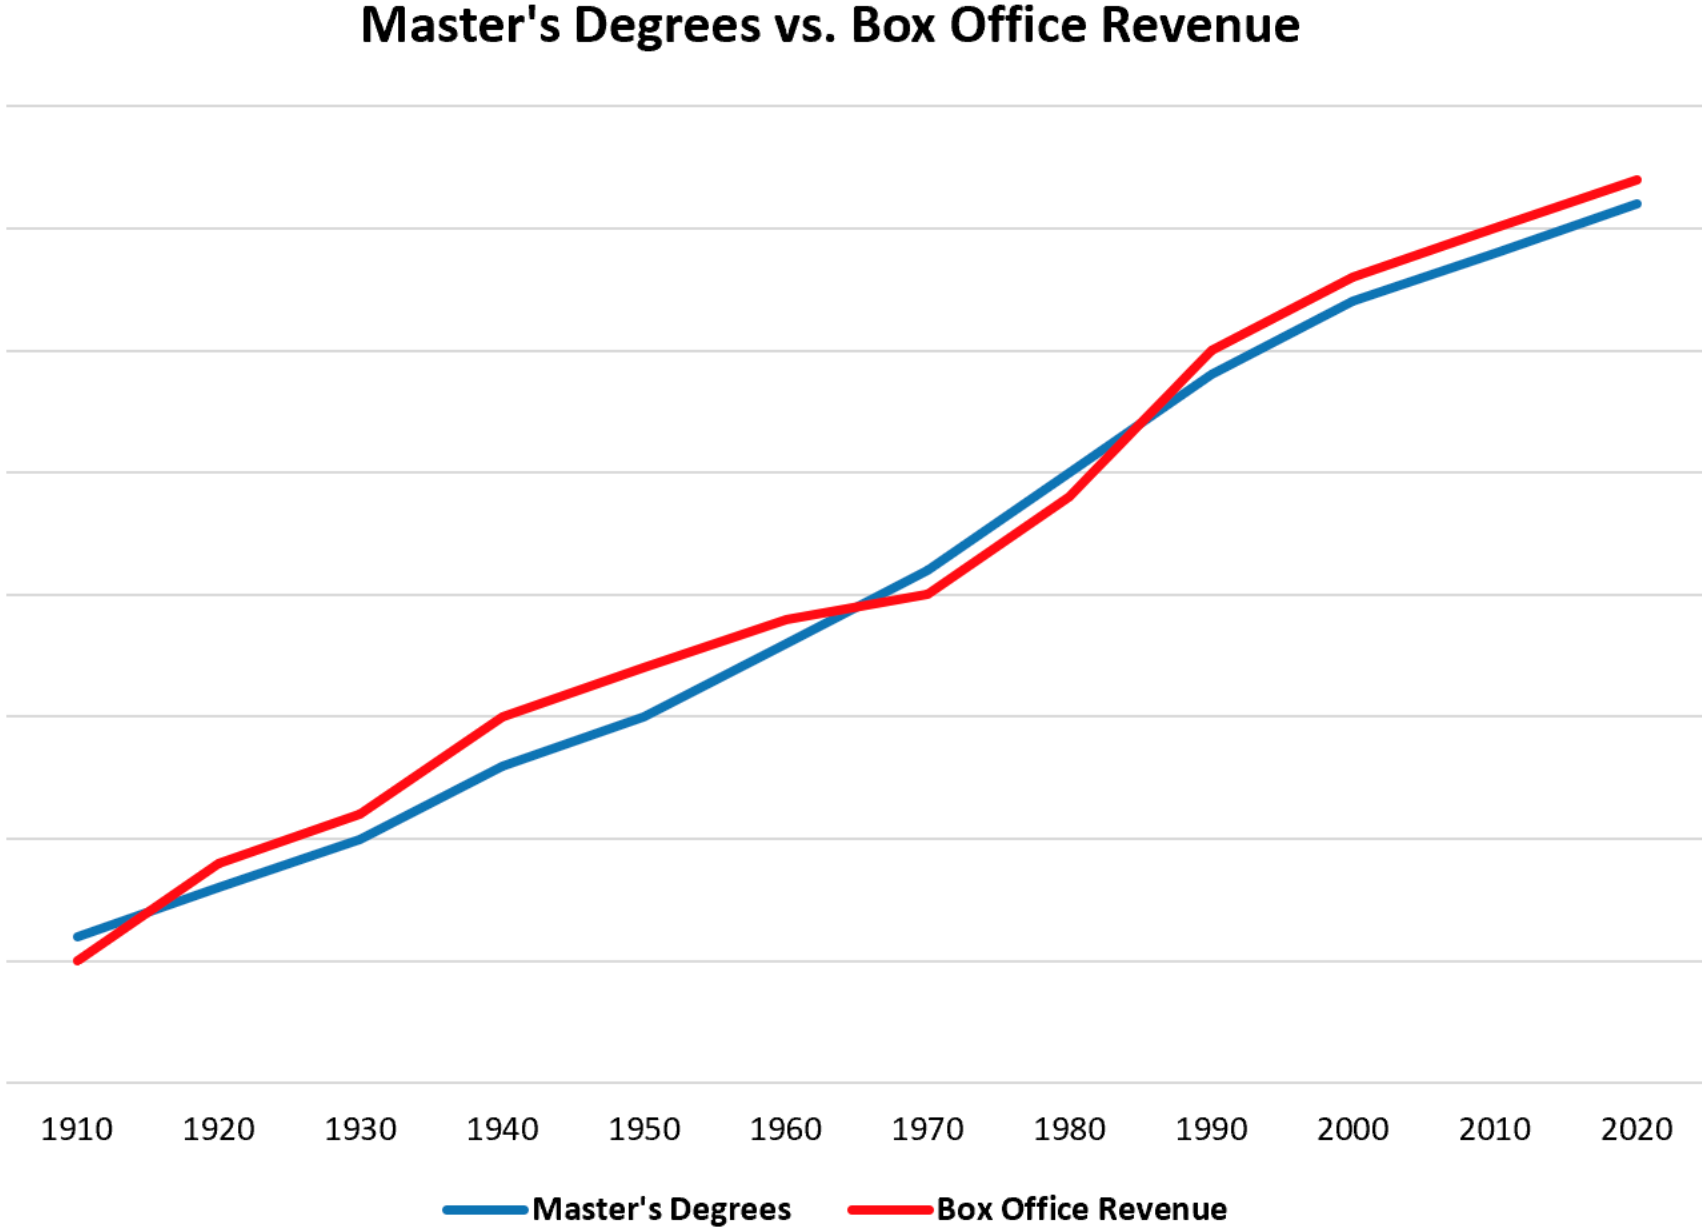</a>
___

### Gotcha #2. non-linear relationship
<br>
- $H_0$: there is no linear relationship between x and y
<br>
- $H_a$: there is a linear relationship between x and y

In [29]:
x = np.linspace(-3, 3)
y = x ** 2

In [30]:
#calculate r and p
r, p = stats.pearsonr(x, y)

print('r =', r)
print('p =', p)

r = -1.5159661290581518e-16
p = 0.999999999999995


In [31]:
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


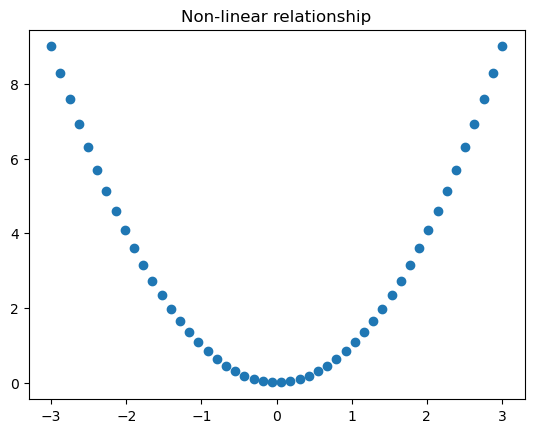

In [32]:
#plot it
plt.scatter(x,y)

plt.title('Non-linear relationship')
plt.show()

<div class="alert alert-danger" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Gotcha #2:</strong>
            <br>
                <b>There is a relationship between x and y
<br>
However, it's NOT linear!</b>
        </div>   
    </div> 
</div>

<hr style="border:0.5px solid gray">

### Gotcha #3. Confounding variable
<br>
We must be careful because correlation doesn't tell the whole story of a dataset. That is, correlation just looks at two variables in isolation, and doesn't account for any others. For example, a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.

What is the relationship between coffee consumed and exam scores?

In [33]:
#calculate r and p 
r,p = stats.pearsonr(df.coffee_consumed, df.exam_score)

print('r = ', r)
print('p = ', p)

r =  -0.9937792168631225
p =  7.739013921768295e-38


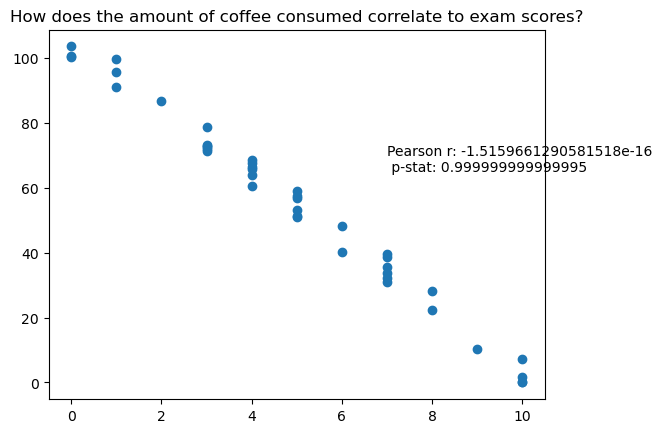

In [34]:
#plot it
plt.scatter(df.coffee_consumed, df.exam_score)

plt.title('How does the amount of coffee consumed correlate to exam scores?')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]}\n p-stat: {stats.pearsonr(x,y)[1]}', xy=(7,65))
plt.show()

<b>This shows us that exam scores and coffee consumed have a strong negative correlation.
<br>
But is there something else affecting this?
<br>
Yes!!! Probably hours slept! Which is our potential confounder.
<br>
Let's check it out by looking at how hours slept affect both of our variables.</b>

Let's look at hours slept and coffee consumed

r= -1.0


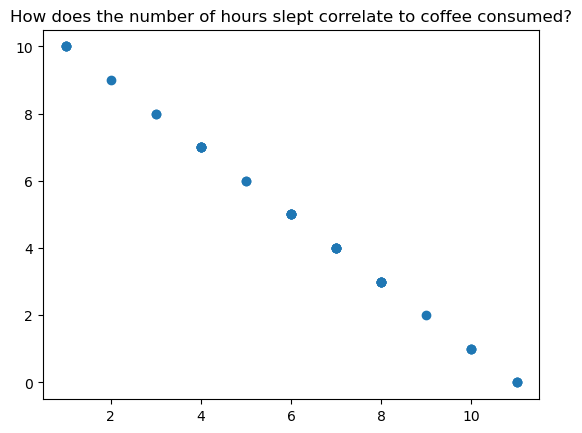

In [35]:
#calculate r and p
r, p = stats.pearsonr(df.hours_slept, df.coffee_consumed)

#plot it
plt.scatter(df.hours_slept, df.coffee_consumed)
plt.title('How does the number of hours slept correlate to coffee consumed?')
print('r=', r)

Let's look at hours slept and exam scores

r= 0.9937792168631225


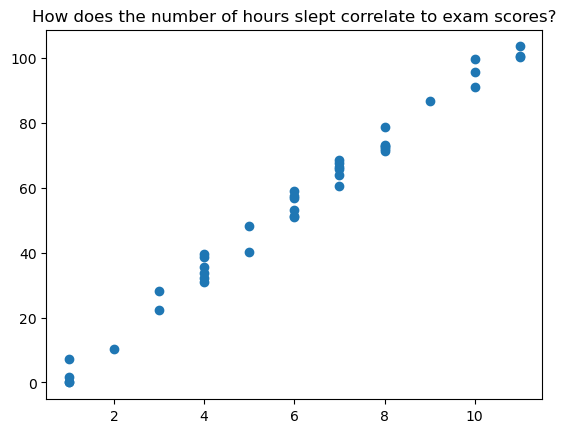

In [36]:
#calculate r and p
r, p = stats.pearsonr(df.hours_slept, df.exam_score)

#plot it
plt.scatter(df.hours_slept, df.exam_score)
plt.title('How does the number of hours slept correlate to exam scores?')
print('r=', r)

<div class="alert alert-danger" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Gotcha #3:</strong>
            <br>


<b>This is a confounder</b>
            <br>
We saw a correlation between our independent variable and dependent variable

coffee consumed ----> exam scores

However, we have a confounder that affects both our independent variable and dependent variable

hours slept ----> coffee consumed

&

hours slept ----> exam score

Therefore, our confounder caused spurious correlation between our indepedent variable and dependent variable

<hr style="border:0.5px solid gray">

### Gotcha #4. Relationship Magnitude

How does coffee consumption relate to exam scores?

In [37]:
coffee_consumption = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

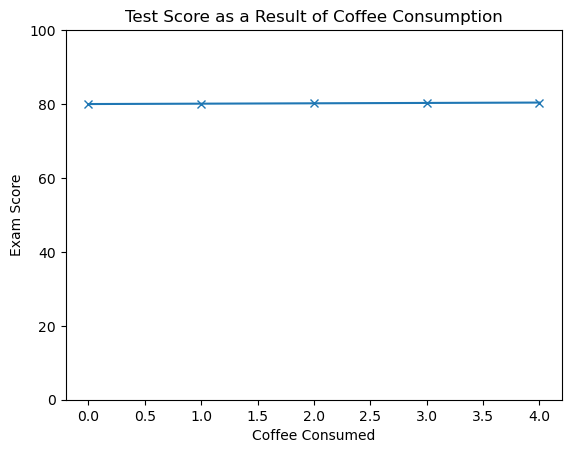

r= 1.0


In [38]:
#calculate r and p
r, p = stats.pearsonr(coffee_consumption, exam_score)

#plot it
plt.plot(coffee_consumption, exam_score, marker='x')
plt.ylim(0, 100)
plt.annotate(f'Pearson r: {stats.pearsonr(coffee_consumption,exam_score)[0]}\n p-stat: {stats.pearsonr(coffee_consumption,exam_score)[1]}', xy=(7,65))
plt.xlabel('Coffee Consumed')
plt.ylabel('Exam Score')
plt.title('Test Score as a Result of Coffee Consumption')
plt.show()
print('r=', r)


<hr style="border:1.5px solid black">

## Exercise Guidance
- What does it mean to "control for"?
- Let's look at the relationship between exam scores and hours studied and control for handedness!

<b> Option A: Regular way - Without controling for a variable</b>

In [39]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


We're gonna use seaborn to plot this time

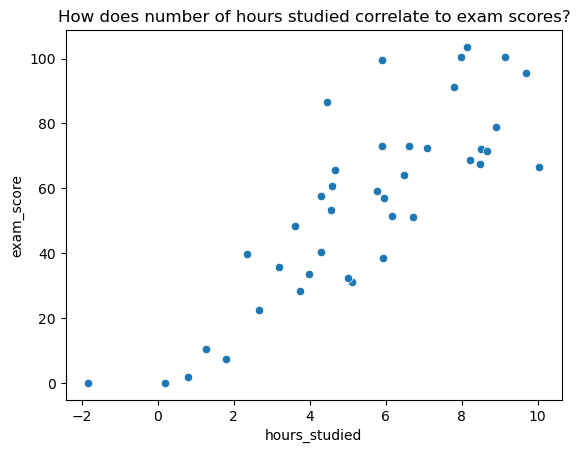

In [40]:
#relpot
sns.scatterplot(data=df, x='hours_studied', y='exam_score')
plt.title('How does number of hours studied correlate to exam scores?')
plt.show()

In [41]:
#calculate r and p
r, p = stats.pearsonr(df.hours_studied, df.exam_score)
print('r =', r)
print('p =', p)

r = 0.8351498542413308
p = 2.0762953315462826e-11


<b> Option B: Controlling for handedness!</b>

In [42]:
#look at our data
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [43]:
#look at our handedness options (value_counts)
df.handedness.value_counts()

right    23
left     17
Name: handedness, dtype: int64

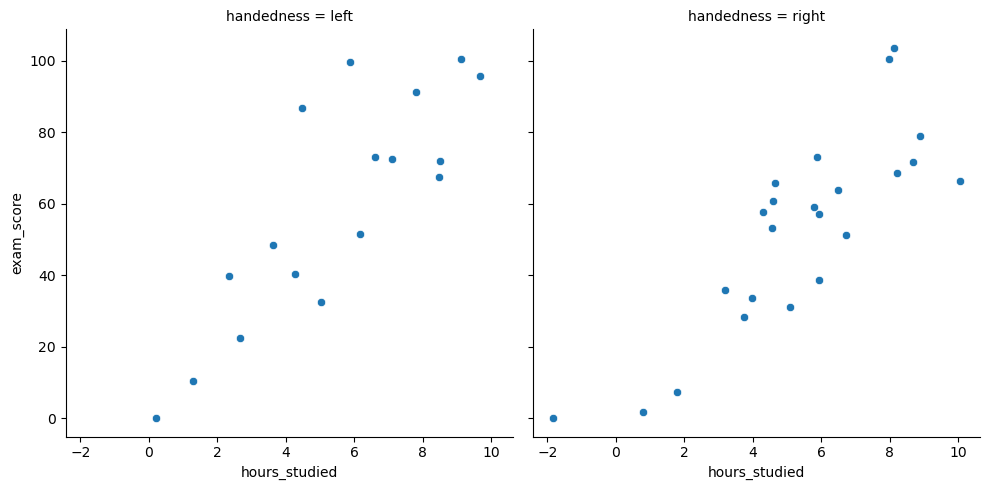

In [44]:
#show separate columns using col
sns.relplot(data=df, x='hours_studied', y='exam_score', col='handedness')
plt.show()

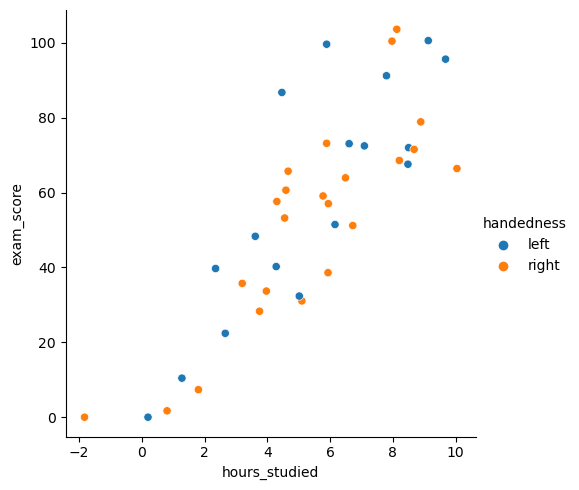

In [45]:
#show different colors using hue
sns.relplot(data=df, x='hours_studied', y='exam_score', hue='handedness')
plt.show()

In [46]:
#create separate dfs for left and right handedness
lefties = df [ df.handedness == 'left']
righties = df [ df.handedness == 'right']

In [47]:
r, p = stats.pearsonr(lefties.exam_score, lefties.hours_studied)
print(f'''Lefties
  r = {r}
  p = {p}''')

Lefties
  r = 0.8389846518512478
  p = 2.561723682481375e-05


In [48]:
r, p = stats.pearsonr(righties.exam_score, righties.hours_studied)
print(f'''Righties
  r = {r}
  p = {p}''')

Righties
  r = 0.8407115600383273
  p = 5.114047317102283e-07


<b>we reject the null hypothesis in both cases</b>

___
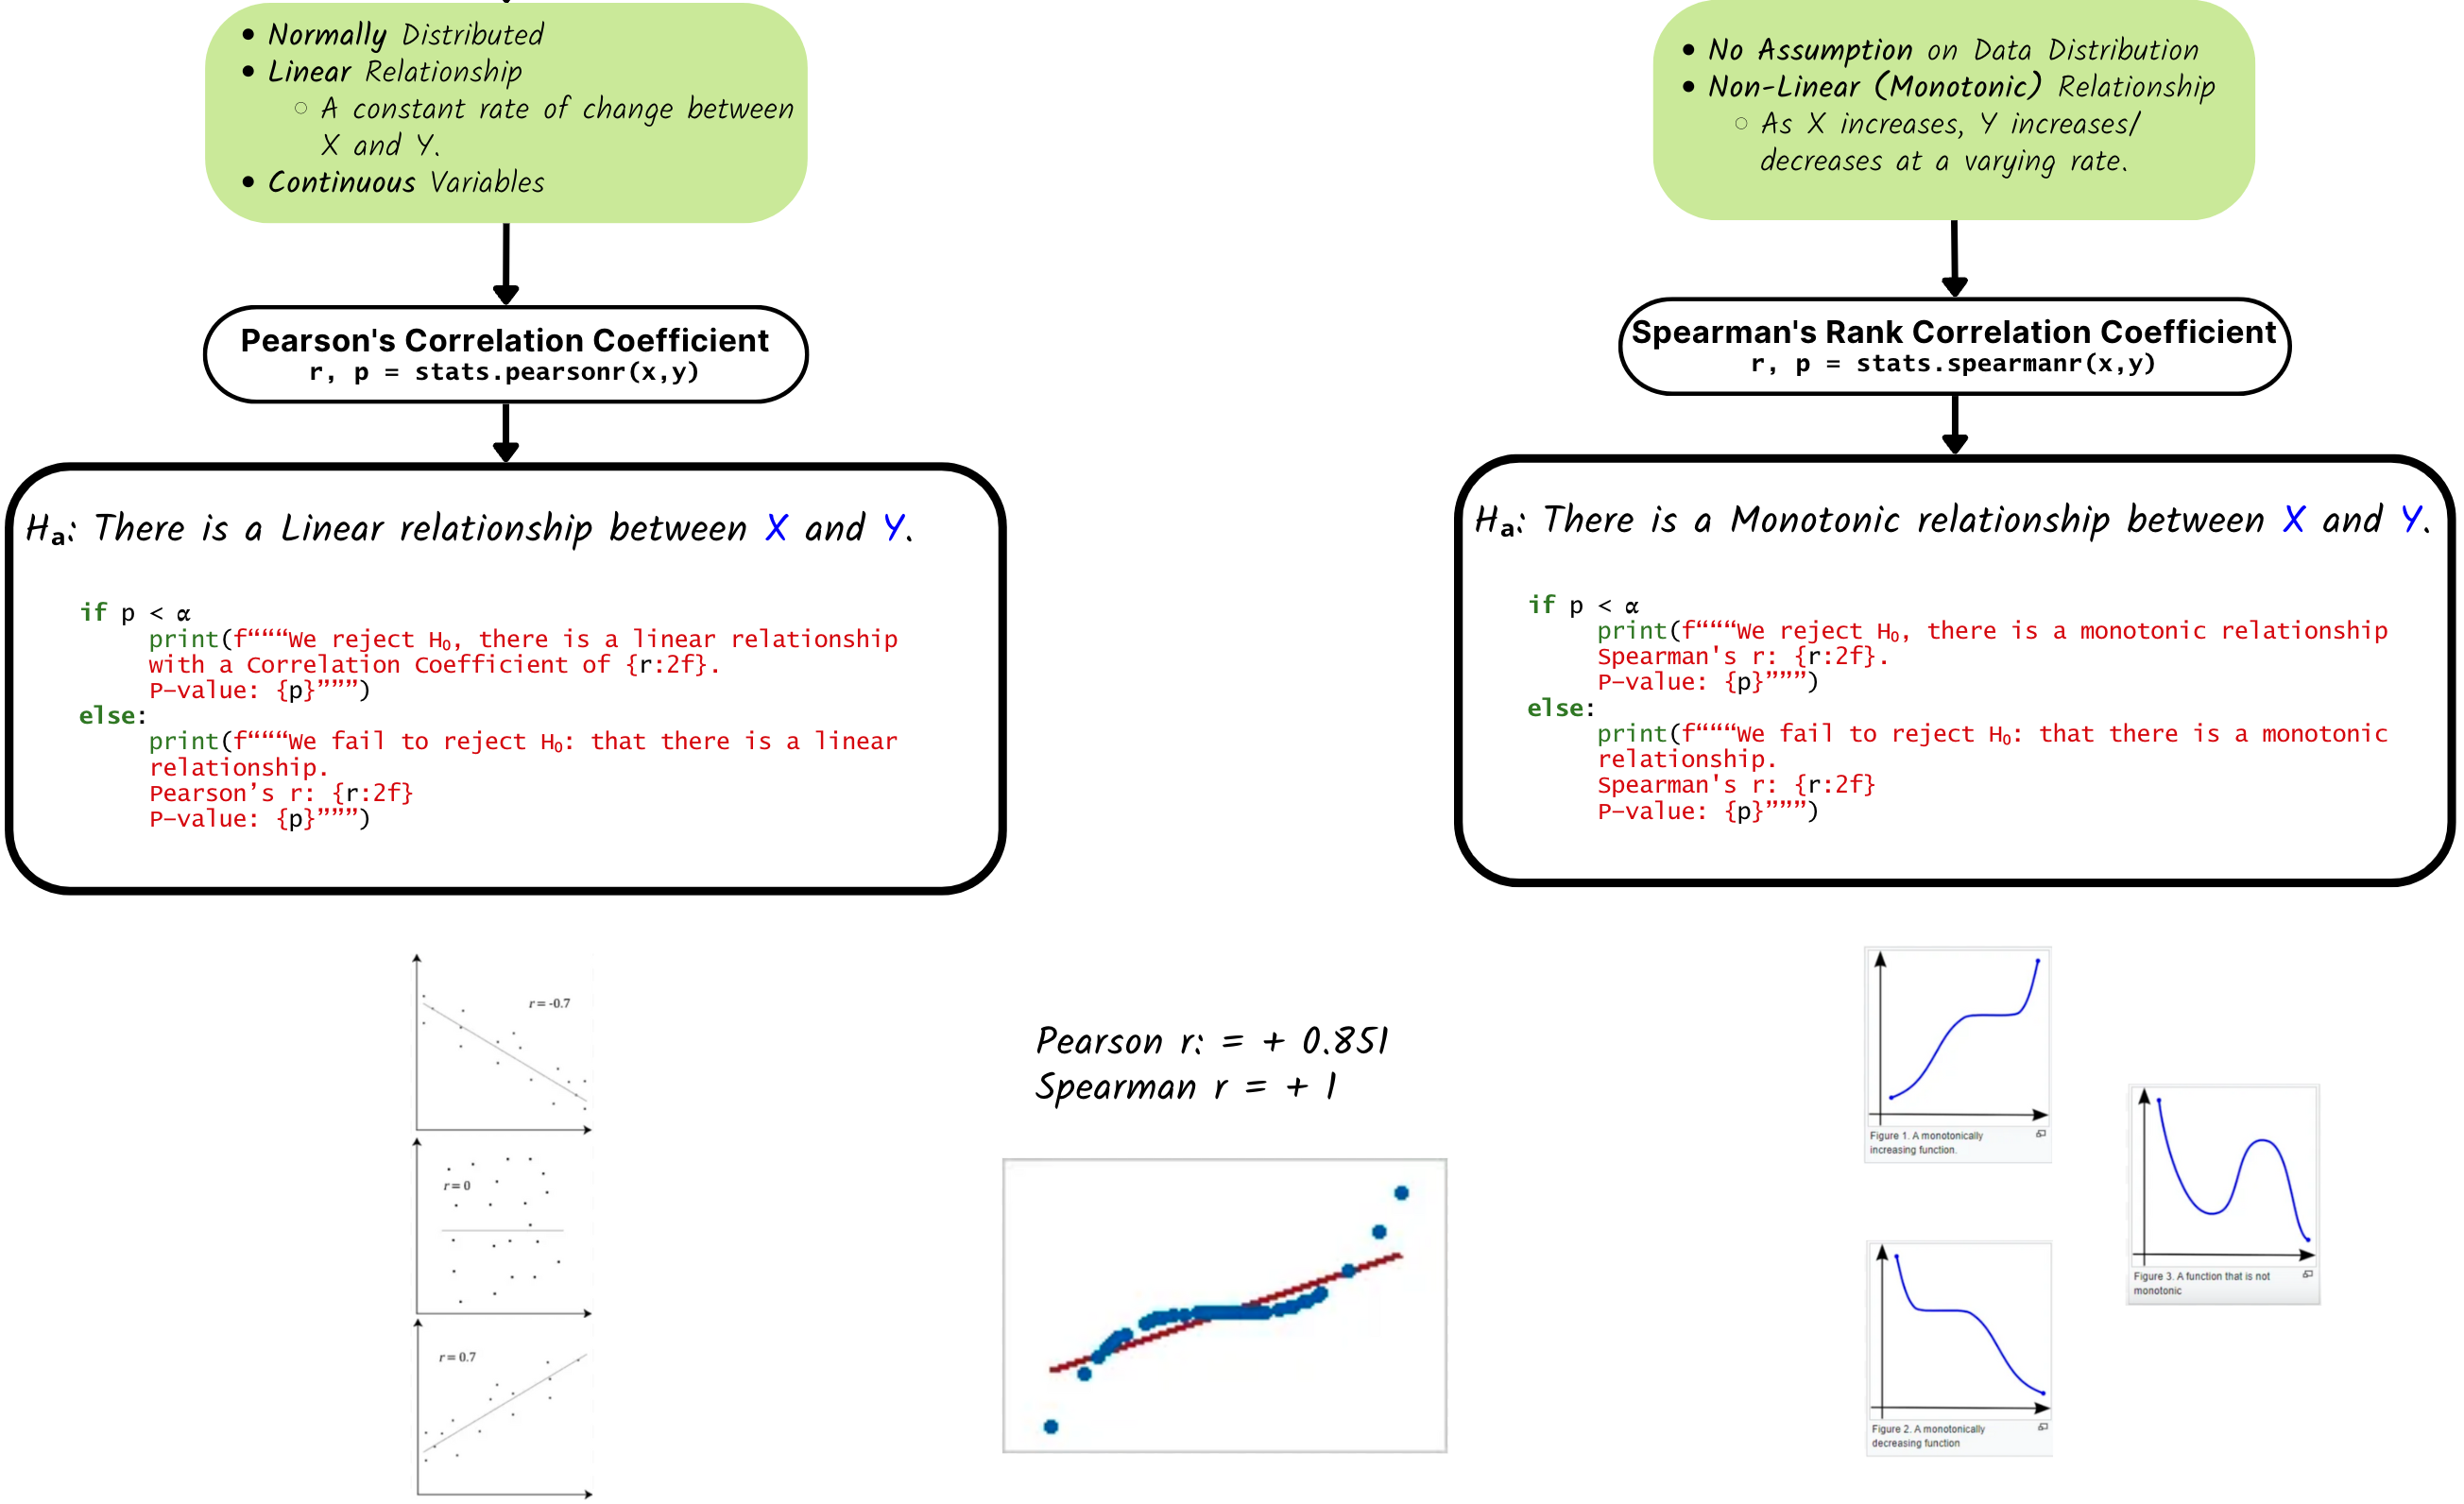